In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
feature1_index = 0
feature2_index = 1
X_visualize = X[:, [feature1_index, feature2_index]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_visualize, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

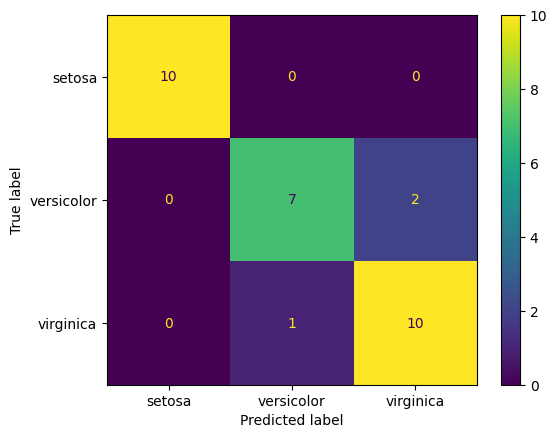

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

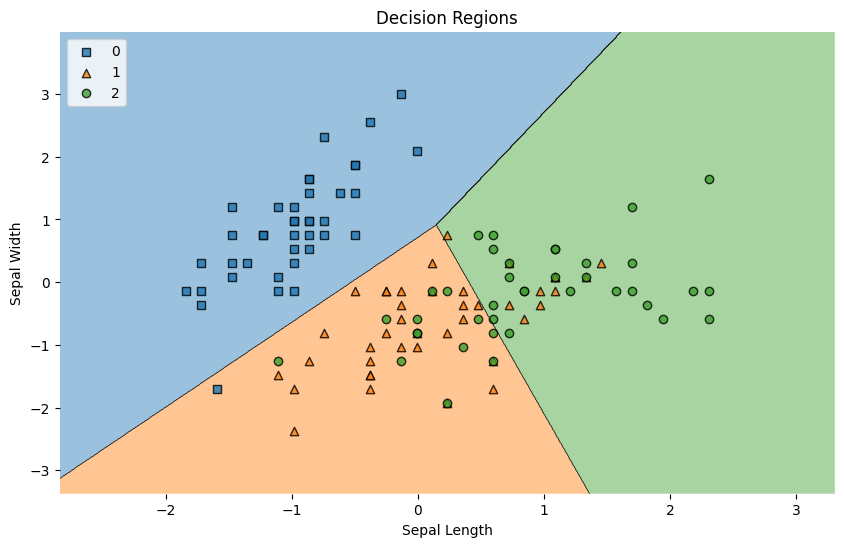

In [ ]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,6))
plot_decision_regions(X_train_scaled, y_train, clf=model, legend=2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision Regions')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

y_prob = model.predict_proba(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_prob)

print("Accuracy:", accuracy)
print("Log Loss:", log_loss_value)

Accuracy: 0.9
Log Loss: 0.38238682966753273


In [ ]:
print(f"Accuracy is {accuracy} and Logistic Loss is {log_loss_value:.3f}")

Accuracy is 0.9 and Logistic Loss is 0.382
